In [17]:
import numpy as np
import sklearn
import matplotlib
import cvxpy as cp
import torch
import torch.nn as nn
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

np.random.seed(632)


## Problem 1
### A

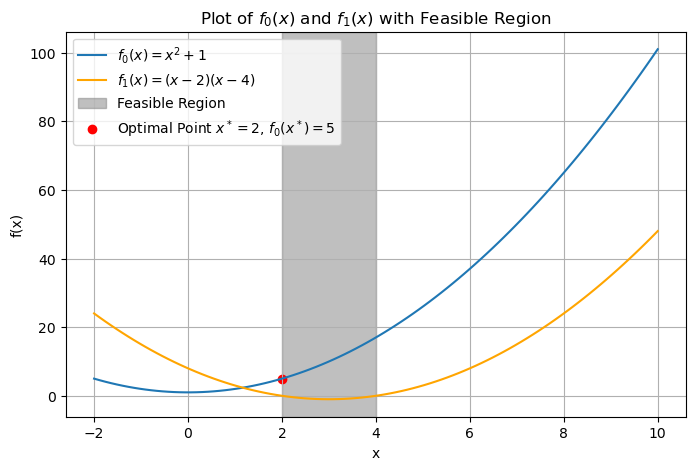

In [18]:
def f0(x):
    return x**2 + 1
def f1(x):
    return (x - 2)*(x - 4)

x = np.linspace(-2, 10, 100)
y0 = f0(x)
y1 = f1(x)

feasible_x = x[(x >= 2) & (x <= 4)]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, y0, label='$f_0(x) = x^2 + 1$')
plt.plot(x, y1, label='$f_1(x) = (x-2)(x-4)$', color='orange')

# Highlight the region between 2 and 4
plt.axvspan(2, 4, color='grey', alpha=0.5, label='Feasible Region')

# Plot optimal point x = 2
plt.scatter(2, f0(2), color='red', label=f"Optimal Point $x^* = 2$, $f_0(x^*) = {f0(2)}$")

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $f_0(x)$ and $f_1(x)$ with Feasible Region')
plt.legend()
plt.grid(True)
plt.show()

### B
We will first write out the Lagrange dual. The Lagrange dual is given by
$\begin{align}
L(x, \lambda) & = (1 + \lambda)x^2 - 6\lambda x + (1 + 8 \lambda)
\end{align}$

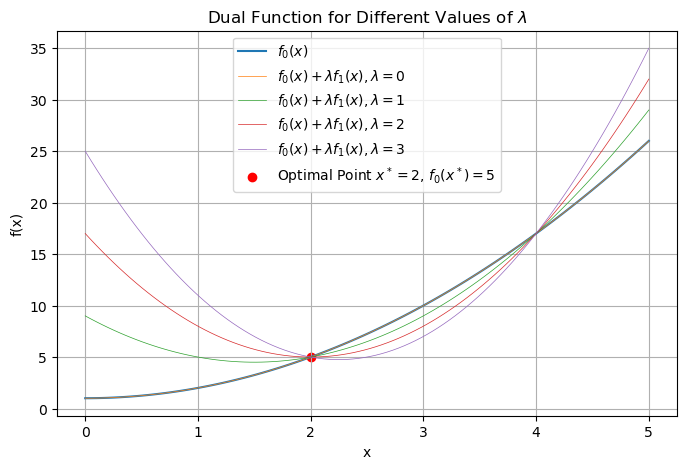

In [19]:
# Plot the dual for a few values of lambda
x = np.linspace(0, 5, 100)
lambdas = [0, 1, 2, 3]
plt.figure(figsize=(8, 5))
plt.plot(x, f0(x), label='$f_0(x)$')
for l in lambdas:
    plt.plot(x, f0(x) + l*f1(x), label=f"$f_0(x) + λ f_1(x), λ = {l}$", linewidth=.5)
plt.xlabel('x')
plt.ylabel('f(x)')

# plot the optimal point
plt.scatter(2, f0(2), color='red', label=f"Optimal Point $x^* = 2$, $f_0(x^*) = {f0(2)}$")
plt.title('Dual Function for Different Values of $\lambda$')
plt.legend()
plt.grid(True)
plt.show()

Notice first the minimum of $L(x, \lambda)$ with respect to $x$ is always less than $p^*$ as the coefficient of $x^2$ is always positive. Notice that the maximum minimum of $L(x, \lambda)$ occurs at $\lambda = 2$. Therefore, we have that $p^* = g(\lambda)$ for $\lambda = 2$.

Notice moreover that whenever $\lambda \leq -1$ then the function is unbounded below. Therefore, we will consider the cases where $\lambda$ is above and below $-1$ separately. When $\lambda > -1$, we have that the minimum of $L(x, \lambda)$ is given by
$\begin{align}
g(\lambda) & = \min_{x} L(x, \lambda) \\
& = \min_{x} (1 + \lambda)x^2 - 6\lambda x + (1 + 8 \lambda) \\
\end{align}$
Taking the derivative with respect to $x$ and setting it equal to zero, we have that
$\begin{align}
\frac{dL(x, \lambda)}{dx} & = 2(1 + \lambda)x - 6\lambda = 0 \\
\end{align}$
Solving for $x$, we have that
$\begin{align}
x & = \frac{3\lambda}{1 + \lambda}
\end{align}$
Plugging this into $L(x, \lambda)$, we have that
$\begin{align}
g(\lambda) & = (1 + \lambda)\left(\frac{3\lambda}{1 + \lambda}\right)^2 - 6\lambda\left(\frac{3\lambda}{1 + \lambda}\right) + (1 + 8 \lambda) \\
& = \frac{9\lambda^2}{(1 + \lambda)} - \frac{18\lambda^2}{(1 + \lambda)} + (1 + 8 \lambda) \\
& = \frac{-9\lambda^2}{(1 + \lambda)} + (1 + 8 \lambda) \\
\end{align}$

When $\lambda \leq -1$, we have that the minimum of $L(x, \lambda)$ is given by $-\infty$. Therefore, our function will be given by 
$\begin{align}
g(\lambda) & = \begin{cases}
\frac{-9\lambda^2}{(1 + \lambda)} + (1 + 8 \lambda) & \text{if } \lambda > -1 \\
-\infty & \text{if } \lambda \leq -1
\end{cases}
\end{align}$
We will plot that function below.

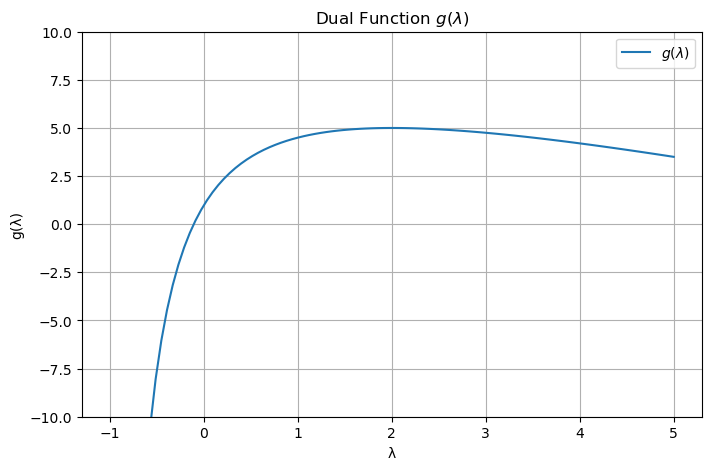

In [20]:
# plot the dual function in lambda
def dual_function(lam):
    return (-9*(lam**2)) / (1 + lam) + (1 + 8 * lam)

lambdas = np.linspace(-0.99999, 5, 100)
plt.figure(figsize=(8, 5))
plt.plot(lambdas, dual_function(lambdas), label='$g(λ)$')
plt.xlabel('λ')
plt.ylabel('g(λ)')
plt.title('Dual Function $g(λ)$')
plt.ylim(-10, 10)
plt.legend()
plt.grid(True)
plt.show()

To show that the function is concave, we will take the second derivative of $L(x, \lambda)$ with respect to $x$. We have that
$\begin{align}
\frac{d^2L(x, \lambda)}{dx^2} & = 2(1 + \lambda)
\end{align}$
As $2(1 + \lambda) > 0$, we have that the function is concave. Therefore, we have that $g(\lambda)$ is concave.

To find the maximum of $g(\lambda)$, we will take the derivative of $g(\lambda)$ with respect to $\lambda$. We have that
$\begin{align}
\frac{dg(\lambda)}{d\lambda} & = \frac{-18\lambda(1 + \lambda) - 9\lambda^2}{(1 + \lambda)^2} + 8 \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8(1 + \lambda)^2}{(1 + \lambda)^2} \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8 + 16\lambda + 8\lambda^2}{(1 + \lambda)^2} \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8 + 16\lambda + 8\lambda^2}{(1 + \lambda)^2} \\
& = \frac{-2\lambda - \lambda^2 + 8}{(1 + \lambda)^2} \\
\end{align}$
Setting this equal to zero, we have that
$\begin{align}
0 & = -2\lambda - \lambda^2 + 8 \\
\end{align}$
Solving for $\lambda$, we have that
$\begin{align}
0 & = -2\lambda - \lambda^2 + 8 \\
\lambda^2 + 2\lambda - 8 & = 0 \\
& = (\lambda + 4)(\lambda - 2) \\
\end{align}$
Therefore, we have that the maximum of $g(\lambda)$ occurs at $\lambda = 2$. Therefore, we have that the maximum of $g(\lambda)$ is given by
$\begin{align}
g(2) & = \frac{-9(2)^2}{(1 + 2)} + (1 + 8 \cdot 2) \\
& = \frac{-9(4)}{3} + (1 + 16) \\
& = -12 + 17 \\
& = 5
\end{align}$
Therefore, we have that the maximum of $g(\lambda)$ is given by $5$ and occurs at $\lambda = 2$.

### C
We will well characterize the dual problem. Clearly, the dual problem is 
$\begin{align}
\text{maximize } \:\:\: & \:\:\: \frac{-9\lambda^2}{1 + \lambda} + 8\lambda + 1 \\
\text{subject to } & \:\:\: \lambda \geq 0
\end{align}$
We have already shown concavity of the function, but we will show it again. To show that the function is concave, we will take the second derivative of $L(x, \lambda)$ with respect to $x$. We have that
$\begin{align}
\frac{d^2L(x, \lambda)}{dx^2} & = 2(1 + \lambda)
\end{align}$
As $2(1 + \lambda) > 0$, we have that the function is concave. Therefore, we have that $g(\lambda)$ is concave.

To find the maximum of $g(\lambda)$, we will take the derivative of $g(\lambda)$ with respect to $\lambda$. We have that
$\begin{align}
\frac{dg(\lambda)}{d\lambda} & = \frac{-18\lambda(1 + \lambda) - 9\lambda^2}{(1 + \lambda)^2} + 8 \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8(1 + \lambda)^2}{(1 + \lambda)^2} \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8 + 16\lambda + 8\lambda^2}{(1 + \lambda)^2} \\
& = \frac{-18\lambda - 18\lambda^2 - 9\lambda^2 + 8 + 16\lambda + 8\lambda^2}{(1 + \lambda)^2} \\
& = \frac{-2\lambda - \lambda^2 + 8}{(1 + \lambda)^2} \\
\end{align}$
Setting this equal to zero, we have that
$\begin{align}
0 & = -2\lambda - \lambda^2 + 8 \\
\end{align}$
Solving for $\lambda$, we have that
$\begin{align}
0 & = -2\lambda - \lambda^2 + 8 \\
\lambda^2 + 2\lambda - 8 & = 0 \\
& = (\lambda + 4)(\lambda - 2) \\
\end{align}$
Therefore, we have that the maximum of $g(\lambda)$ occurs at $\lambda = 2$ with value $p^* = 5$. Thus, strong duality holds.

### D
Let us first find the $\inf_x(x^2 - 6x + 8)$. We notice that the minimum occurs where the derivative is zero, and thus we have that
$\begin{align}
\frac{d}{dx}(x^2 - 6x + 8) & = 2x - 6 = 0 \\
\implies x & = 3
\end{align}$
Now, at $x = 3$, we see that the minimum is given by $3^2 - 6 \cdot 3 + 8 = 9 - 18 + 8 = -1$. Therefore, we have that $\inf_x(x^2 - 6x + 8) = -1$.

Thus, we know that the problem is infeasible for $u < -1$. To find the feasible set for $u \geq -1$, we will find the roots of $x^2 - 6x + 8 - u$ with respect to $x$. Solving for the roots gives us
$\begin{align}
0 & = x^2 - 6x + 8 - u \\
& = (x - 3)^2 - 1 - u \\
\implies x & = 3 \pm \sqrt{1 + u}
\end{align}$
Notice that if $1 + u < 0$, then the roots are complex and thus the problem is infeasible. Therefore, we have that the feasible set is given by $1 + u \geq 0$ or $u \geq -1$. Note we already showed that, but it is nice to see it be shown here again. Moreover, if $u \geq 8$, then $\sqrt{1 + u} \geq 3$ and the solution to the problem will just be the unconstrained minimum of $f_0$ which is $1$. Lastly for $-1 \leq u \leq 8$, we can just minimize $3 - \sqrt{1 + u}$ and $3 + \sqrt{1 + u}$ and take the minimum of the two. Immediately, we see that the minimum will come from $3 - \sqrt{1 + u}$ and thus the minimum will be given by $11 + u - 6\sqrt{1 + u}$.

So, we can write all of this out as:
$\begin{align}
p^*(u) & = \begin{cases}
-\infty & \text{if } u < -1 \\
11 + u - 6\sqrt{1 + u} & \text{if } -1 \leq u < 8 \\
1 & \text{if } u \geq 8
\end{cases}
\end{align}$

We will plot this function below.

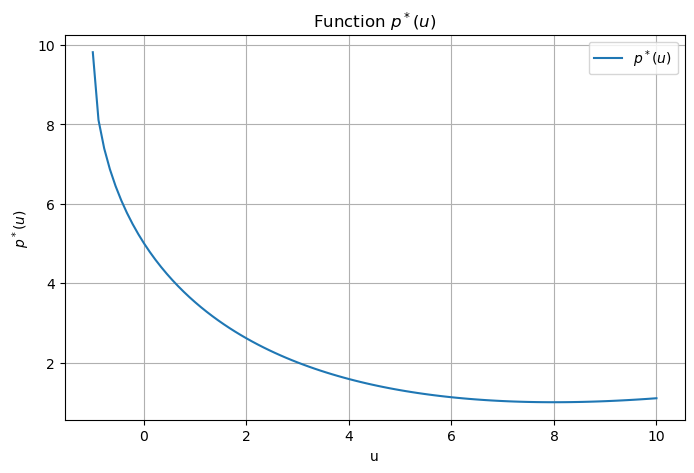

In [26]:
def pstar(u):
    return 11 + u - 6 * np.sqrt(1 + u)

u = np.linspace(-.999, 10, 100)
plt.figure(figsize=(8, 5))
plt.plot(u, pstar(u), label='$p^*(u)$')
plt.xlabel('u')
plt.ylabel('$p^*(u)$')
plt.title('Function $p^*(u)$')
plt.legend()
plt.grid(True)
plt.show()

To find the derivative at $u = 0$, we will take the derivative of $p^*(u)$ with respect to $u$. We have that
$\begin{align}
\frac{dp^*(u)}{du} & = 1 - \frac{3}{\sqrt{1 + u}}
\end{align}$
Putting in $u = 0$, we have that
$\begin{align}
\frac{dp^*(0)}{du} & = 1 - \frac{3}{\sqrt{1}} \\
& = 1 - 3 \\
& = -2
\end{align}$
Which is exactly $-\lambda^*$ from above. $\blacksquare$

## Problem 2


## Problem 3
Note that we can use that the dual norm of $\vert\vert \cdot \vert\vert_2$ is $\vert\vert \cdot \vert\vert_2$. As the problem says, we will introduce an equality constraint that $y_i  = A_i \cdot x + b_i$. We will then write out the Lagrangian as
$\begin{align}
L(x, \lambda) & = \frac{1}{2}\vert\vert x - x_0 \vert\vert_2^2 + \sum_{i = 1}^N \lambda_i(y_i - A_i \cdot x - b_i) + \sum_{i = 1}^N \vert\vert y_i\vert\vert_2
\end{align}$

## Problem 4

## Problem 5

In [ ]:
def generate_linear_data(n, d, sigma):
    """
    Generates linear data with noise.

    :param n: Number of data points
    :param d: Dimension of each data point
    :param sigma: Standard deviation of Gaussian noise
    :return: Tuple of (X, y) where X is the feature matrix and y is the target vector
    """
    # Randomly generate coefficients for the linear model (true coefficients)
    beta_true = np.ones(d,)

    # Generate feature matrix X
    X = np.random.randn(n, d)

    # Generate target values with noise
    y = X.dot(beta_true) + sigma * np.random.randn(n)

    return X, y, beta_true

# Example usage
n = 100  # Number of data points
d = 20    # Dimension of each data point
sigma = 0  # Noise level

X, y, beta_true = generate_linear_data(n, d, sigma)

# Build the LAD loss and its smoothed approximation

In [ ]:

# Define linear network
class LinearModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1, bias=False)
        nn.init.constant_(self.linear.weight, 0.0)

    def forward(self, x):
        return self.linear(x)


# LAD loss
def lad_loss(y_pred, y_true):
    return torch.sum(torch.abs(y_pred - y_true))

# Smoothed LAD loss
def smoothed_lad_loss(y_pred, y_true, gamma):
    diff = y_pred - y_true
    return torch.sum(torch.log(torch.exp(gamma * diff) + torch.exp(-gamma * diff)) / gamma)



In [ ]:
# Learning parameters
lr = 0.001  # learning rate
num_iter = 200  # number of iterations

gamma_values = [1, 2, 3, 4,5, 6]
# Set trackers for losses
losses = {gamma: [] for gamma in gamma_values}
losses['nonsmooth'] = []
betas = {gamma: None for gamma in gamma_values}
betas['nonsmooth'] = None

# save the lossses of each function.
# losses[1] is the losses of the smoothed lad loss with $\gamma = 1$.
# save the last iterate into betas
print(losses, betas)

# Now write down the code that implements GD for these objective functions. Set $\alpha = 0.001$ and $T = 200$, initialize from zero vector.

In [ ]:
def gradient_descent(y: torch.Tensor, x: torch.Tensor, beta: torch.Tensor, alpha: float, max_iter: int, epsilon: float = 1e-8) -> torch.Tensor:
    beta = beta.clone()
    losses = []
    for i in range(max_iter):
        beta -= alpha * torch.sign(x.t() @ (x @ beta - y))
        loss = LAD(y, x, beta)
        losses.append(loss)
        if LAD(y, x, beta) < epsilon:
            break
    return beta, losses


In [ ]:
for gamma in gamma_values:
    print(f"Beta estimation error for gamma={gamma}:", np.linalg.norm(betas[gamma] - beta_true))
print("Beta estimation error for Nonsmooth LAD:", np.linalg.norm(betas['nonsmooth'] - beta_true))

# Plotting the loss curves
for gamma in gamma_values:
    plt.plot(losses[gamma][0:200], label=f'Smoothed LAD (gamma={gamma})')
plt.plot(losses['nonsmooth'][0:200], label='Nonsmooth LAD', color='k', linestyle='--')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss Curves for Different Gammas')
plt.legend()
plt.show()



# Plotting the loss curves
for gamma in gamma_values:
    plt.plot(np.arange(100)+100, losses[gamma][100:200], label=f'Smoothed LAD (gamma={gamma})')
plt.plot(np.arange(100)+100, losses['nonsmooth'][100:200], label='Nonsmooth LAD', color='k', linestyle='--')
plt.xlabel('Number of iterations after 100 iterations')
plt.ylabel('Loss')
plt.title('Loss Curves for Different Gammas')
plt.legend()
plt.show()

## Problem 6

# Support Vector Machine -- Primal and Dual Formulations

#### In this Problem, you will implement dual formulation of SVM

![SVM, see https://en.wikipedia.org/wiki/Support_vector_machine](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/512px-SVM_margin.png)

## SVM

SVMs are a powerful supervised machine learning algorithm for classification and regression tasks. They are particularly well-suited for handling high-dimensional data and have proven effective in a wide range of applications, including text classification, image recognition, bioinformatics, and more.

## Mathematical Formulation

SVMs aim to find a hyperplane that best separates two classes in a dataset, while maximizing the margin between them. The hyperplane is defined by a weight vector $w$ and a bias term $b$.


### Hard-margin SVM

**Optimization**: given data $((x_i,y_i))_{i=1}^n$:
$\begin{align}
\min_{w, b } \quad & \frac{1}{2} \|w\|^2  \notag   \\
\text{subject to} \quad & y_i \cdot (w^\top  x_i + b) \geq 1  , \quad i = 1, \ldots, n.  
\end{align}$


This only works for linearly seperable data! That is, this problem has a solution if we can find a hyperplane that **perfectly separates data**.


### Soft-Margin SVM
The soft margin SVM introduces slack variables to allow for some misclassifications, making it more robust to noise and outliers. The optimization problem for the soft margin SVM can be written as  
$\begin{equation}
\begin{aligned}
\min_{w, b, \zeta} \quad & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \zeta_i \\
\text{subject to} \quad & y_i (w^T x_i + b) \geq 1 - \zeta_i, \quad i = 1, \ldots, n, \\
& \zeta_i \geq 0, \quad i = 1, \ldots, n.
\end{aligned}
\end{equation}$




## Dual SVMs

### Hard-Margin Dual SVM
$
\begin{equation}
\begin{aligned}
\max_{\alpha} \quad & \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j \\
\text{subject to} \quad & \sum_{i=1}^n \alpha_i y_i = 0, \\
& \alpha_i \geq 0, \quad i = 1, \ldots, n.
\end{aligned}
\end{equation}
$
### Soft-Margin Dual SVM
$
\begin{equation}
\begin{aligned}
\max_{\alpha} \quad & \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j \\
\text{subject to} \quad & \sum_{i=1}^n \alpha_i y_i = 0, \\
& 0 \leq \alpha_i \leq C, \quad i = 1, \ldots, n.
\end{aligned}
\end{equation}
$


In [14]:
## Define function that plots data points

def get_line(W, b, x):
    return (-W[0]*x+b)/W[1]

def plot_binary(X, Y, W=None, b=None):
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    x1 = np.arange(x1_min, x1_max, .02)
    xx1, xx2 = np.meshgrid(x1, np.arange(x2_min, x2_max, .02))
    if W is not None and b is not None:
        decision = np.c_[xx1.ravel(), xx2.ravel()] @ W + b
        plt.contourf(xx1, xx2, decision.reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)
        plt.colorbar()
        for intercept in [-1,0,1]:
            plt.plot(x1, get_line(W, b + intercept, x1), c='black')
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:,0],X[:,1], c=Y.ravel(), cmap=cm_bright)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()




def plot_binary_with_model(X, Y, model, threshold=0):
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    x1 = np.arange(x1_min, x1_max, .02)
    xx1, xx2 = np.meshgrid(x1, np.arange(x2_min, x2_max, .02))

    # Use the model to make predictions
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    decision_values = model(grid_tensor).detach().numpy()

    decision_binary = np.sign(decision_values - threshold)
    # Plot the decision boundary
    plt.contourf(xx1, xx2, decision_binary.reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)
    plt.colorbar()

    # Plot the data points
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:,0], X[:,1], c=Y.ravel(), cmap=cm_bright)

    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

# Generate Data

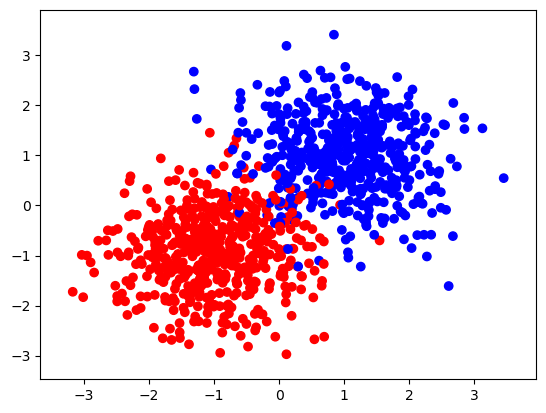

In [15]:
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=1000, centers=[(-1, -1), (1, 1)], cluster_std=0.8)
Y[Y == 0] = -1 # to have +/- 1 labels


plot_binary(X, Y)

# Primal Soft Margin SVM

Optimal w: [2.23245029 2.01252373]
Optimal b: -0.1998054221331045


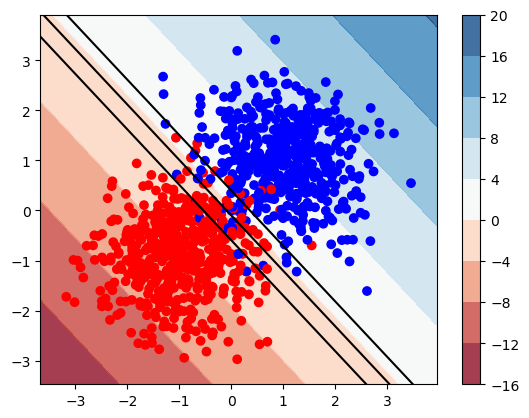

In [16]:
X = np.array(X)
Y = np.array(Y)

# Number of data points
n = X.shape[0]

# Create CVXPY variables for weights, bias, and slack variables
w = cp.Variable(X.shape[1])
b = cp.Variable()
zeta = cp.Variable(n)

# Set regularization parameter
C = 10.0  # You can adjust this value as needed

# Define the objective function
objective = cp.Minimize(cp.norm(w, 2) / 2 + C * cp.sum(zeta))

# Define the constraints
constraints = [
Y[i] * (cp.matmul(w, X[i]) + b) >= 1 - zeta[i] for i in range(n)
]
constraints += [zeta[i] >= 0 for i in range(n)]

# Create and solve the CVXPY problem
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.SCS, verbose=False)

# Extract the optimal values of w and b
w_opt = w.value
b_opt = b.value

print("Optimal w:", w_opt)
print("Optimal b:", b_opt)

# pytorch
plot_binary(X, Y, W=w_opt, b=b_opt)

# Now you are going to write the code for dual soft-margin SVM

In particular, let $K \in \mathbb{R}^{n\times n}$ be a matrix given by
$$
K_{i,j} = y_i \cdot y_j \cdot x_i x_j^\top + \epsilon \cdot I\{ i = j\}
$$
with $\epsilon = 1e-7$.
The objective function becomes
$$ \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j K_{i,j} = \sum_{i=1}^n \alpha_i - 1/2 \cdot \alpha^\top K \alpha  $$

In [ ]:
X = np.array(X)  # Assuming X is your feature matrix
Y = np.array(Y)  # Assuming Y is your label vector with {-1, 1} values

# Number of data points
n = X.shape[0]

# Create kernel matrix
K = np.outer(Y, Y) * (X @ X.T) +  1e-7 * np.eye(n)

# Create CVXPY variable for the Lagrange multipliers
alpha = cp.Variable(n)

# The dual problem objective
dual_objective =  # your code
# The dual problem constraints
dual_constraints =  # Your code

# Create and solve the CVXPY problem
dual_prob = cp.Problem(dual_objective, dual_constraints)
dual_prob.solve(solver=cp.SCS, verbose=False)

# Extract the optimal values of alpha
alpha_opt = alpha.value

# Computing the optimal w and b from alpha
w_dual_opt = np.sum((alpha_opt * Y).reshape(-1, 1) * X, axis=0)
cond = (alpha_opt > 1e-4)  # Small threshold to identify support vectors
b_dual_opt = np.mean(Y[cond] - np.dot(X[cond], w_opt))

print("Optimal w (from dual):", w_dual_opt)
print("Optimal b (from dual):", b_dual_opt)

plot_binary(X, Y, W=w_dual_opt, b=b_dual_opt)


# Nonlinear data and Kernel SVM

In [ ]:
from sklearn.datasets import make_circles

X, Y = make_circles(n_samples=300, noise=0.05)
Y[Y == 0] = -1 #to have +/- 1 labels
plot_binary(X, Y)

Let's use the Radial kernel
\begin{equation}
k(x, x') = \exp\left(-\gamma \|x - x'\|^2\right).
\end{equation}
The matrix $K$ is given by  $K_{i,j} = y_i \cdot y_j \cdot k(x_i , x_j)  + \epsilon \cdot I\{ i = j\}$ with $\gamma = 100$. We set a large $\gamma$ because the decision rule basically is $y = 1$ if $\| x\|_2 \leq t$ for some $t$.

In [ ]:
def rbf_kernel(x1, x2, gamma =0.5):
    """Compute the RBF kernel between two vectors."""
    return np.exp(-gamma * np.linalg.norm(x1 - x2)**2)

# Parameter
gamma = 100  # Adjust this parameter as needed

In [ ]:
X = np.array(X)  # Assuming X is your feature matrix
Y = np.array(Y)  # Assuming Y is your label vector with {-1, 1} values

# Number of data points
n = X.shape[0]

C = 1
# Compute the RBF kernel matrix
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = Y[i] * Y[j] * rbf_kernel(X[i], X[j], gamma)

# Add a small term for numerical stability
K += 1e-5 * np.eye(n)

# Check if K is positive semi-definite
if np.all(np.linalg.eigvals(K) >= 0):
    print("K is positive semi-definite")
else:
    print("K is not positive semi-definite")

K = cp.atoms.affine.wraps.psd_wrap(K) # tell cvxpy to skip checking that K is PD

# Create CVXPY variable for the Lagrange multipliers
alpha = cp.Variable(n)

# The dual problem objective
dual_objective =  # copy your code

# The dual problem constraints
dual_constraints =  # copy your code

# Create and solve the CVXPY problem
dual_prob = cp.Problem(dual_objective, dual_constraints)

dual_prob.solve(solver=cp.SCS, verbose=True)

# Extract the optimal values of alpha
alpha_opt = alpha.value

In [ ]:

def calculate_bias(X, Y, alpha, gamma=0.5, C=5, tol=1e-5):

    support_vectors = (alpha > tol) & (alpha < C)
    b_values = []

    for i in range(len(alpha)):
        if support_vectors[i]:
            b_i = Y[i] - np.sum(alpha * Y * rbf_kernel(X[i], X[support_vectors], gamma))
            b_values.append(b_i)

    return np.mean(b_values)


def plot_kernel_svm(X, Y, alpha, b, gamma):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))

    # Grid of points to classify
    grid = np.c_[xx1.ravel(), xx2.ravel()]

    # Calculate the decision function for each point in the grid
    Z = np.zeros(grid.shape[0])
    for i in range(grid.shape[0]):
        for j in range(len(alpha)):
            Z[i] += alpha[j] * Y[j] * rbf_kernel(X[j], grid[i], gamma)
    Z += b
    Z = Z.reshape(xx1.shape)

    # Plot decision boundary
    plt.contourf(xx1, xx2, Z, levels=[-1, 0, 1], cmap=plt.cm.RdBu, alpha=0.8)
    plt.colorbar()

    # Plot data points
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm_bright, edgecolors='k')

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary for Kernel SVM')
    plt.show()

# Calculate b after solving the dual SVM
b_opt = calculate_bias(X, Y, alpha_opt, gamma = 100, C = 1)
# Plot the decision boundary
plot_kernel_svm(X, Y, alpha_opt, b_opt, gamma = 100)